## La cinétique, molécule par molécule
*Fin de la séance 2b- Durée: 1h*

### Objectifs
Comprendre comment ont peut faire de la cinétique en observant l'état d'une molécule individuellement au cours du temps.

### Position du problème

On part ici d'une situation réelle, pour comprendre dans quel contexte on peut s'intéresser à cette question. Lire le support introductif

In [0]:
from IPython.core.display import display, HTML
display(HTML("""<a href="https://eformation.univ-grenoble-alpes.fr/pluginfile.php/223516/mod_folder/content/0/fluorescence_monomoleculaire.pdf?forcedownload=1">Lire le support introductif</a>"""))

#### Q1
Indiquer ci-dessous les questions qui vous viennent spontanément après lecture.
Comment peut-on remonter à une cinétique globale en mesurant des temps durant lequel la molécule s'accroche au substrat?

### Comment déduire une constante de vitesse de l'observation des états de molécules?

Soit une réaction d'isomérisation:
 
$$ A  \overset{k_{A\rightarrow B}}{\underset{k_{B\rightarrow A}}{\rightleftarrows}} B  $$

Les lois de la cinétique macroscopiques permettent de démontrer l'évolution exponentielle des concentrations en $A$ et $B$ avec une cinétique d'ordre 1. Pour des quantités de molécules $N_A$ et $N_B$, on a le système d'équations différentielles:

$$\left\{ \begin{align} \frac{dN_A}{dt} & = -k_{A\rightarrow B}\ N_A + k_{B\rightarrow A}\ N_B  \\
\frac{dN_B}{dt} & = k_{A\rightarrow B}\ N_A - k_{B\rightarrow A}\ N_B
\end{align} \right. $$

Toutefois, le comportement du système peut être décrit en utilisant la notion de transformation aléatoire à l'échelle d'une molécule.

Ainsi, une molécule $A$ a, pendant un intervalle de temps $dt$, une probabilité $p_{A\rightarrow B}$ de se transformer en molécule $B$. À l'inverse, une molécule $B$ a une probabilité $p_{B\rightarrow A}$ de se transformer en molécule $A$. Le tout forme donc un système que l'on appelle un automate déterministe.

Comment alors arrive t-on à la loi de vitesse que vous connaissez bien maintenant? 

Remarquons déjà que si on divise $N_A$ ou $N_B$ par $N_{tot} = N_A + N_B$, alors on peut interpréter $p_A = N_A/N_{tot}$ (resp. $p_B = N_B/N_{tot}$) comme la probabilité pour une molécule d'être dans un état $A$ (resp. $B$). Et on a:

$$\left\{ \begin{align} \frac{dp_A}{dt} & = -k_{A\rightarrow B}\ p_A + k_{B\rightarrow A}\ p_B  \\
\frac{dp_B}{dt} & = k_{A\rightarrow B}\ p_A - k_{B\rightarrow A}\ p_B
\end{align} \right. $$

La première équation peut être traduite, durant le pas de temps $dt$ en:

$$p_A (t+dt) = (1-k_{A\rightarrow B} dt) p_A(t) +  k_{B\rightarrow A} dt \ p_B(t) $$

$p_A (t+dt)$ se décompose en:
 - (probabilité de rester $A$ si la molécule est déjà $A$) x (probabilité d'être à l'état $A$ à t)
 - (probabilité de basculer de $B$ à $A$) x (probabilité d'être à l'état $B$ à t)

####  Q2 
Pour une assemblée de $N$ molécules (vous ferez varier la valeur de $N$), initialement toutes dans le même état, simuler la variation de la population dans cet état en fonction du temps. Vous pouvez tester différentes valeurs pour la probabilité.

Observer également les bascule entre états de quelques particules.

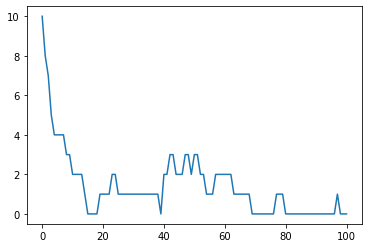

In [1]:
import numpy as np
import random
import scipy as sp
import scipy.integrate as itg
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import *
%matplotlib inline 
#pour affichage dans le notebook

N=10
assembly = [0]*N # 0 = état A et 1 = état B
state = [N] #état global de l'assemblée de particules, ttes A à t=0
statepart = [0] #suivi trajectoire d'une particule
T = 100 #durée expérience
h = 1 #pas de temps
pfwd = 0.1 #probabilité A->B durant dt (kA->B * dt)
pbwd = 0.01 # probabilité B-> A durant dt (kB->A * dt)
for i in range(int(T/h)):
  for k in range(len(assembly)):
    alea = random.random() #tirage nbre aléatoire entre O et 1
    if alea < pfwd and assembly[k] == 0: #donne une probabilité de pfwd
      assembly[k] = 1 #bascule à l'état B
    elif alea < pbwd and assembly[k] == 1: #donne une probabilité de pbwd
      assembly[k] = 0 #bascule à l'état A
  state.append(N-sum(assembly))
  statepart.append(assembly[0]) #on suit l'état de la première particule

plt.plot(state)